In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.2 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 24.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136905 sha256=082bc5ca564d97ff2143f924132dd26993d7b3634619ac5e4f077cc8c1fa7a9a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c1/c6/98/596764d33a44aa6fea2b82c3b995bb1db3b013ec7a6321f8ed
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Question 1: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [10]:
tesla = yf.Ticker("TSLA")

In [11]:
tesla_data = tesla.history(period="max")

In [14]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [36]:
tesla_data.to_csv('tesla_data.csv', index=False)

## Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [29]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Define a user-agent to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Make a request with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Read HTML table
    tesla_revenue = pd.read_html(response.text, match="Tesla Quarterly Revenue", flavor='bs4')[0]
    
    # Rename columns
    tesla_revenue = tesla_revenue.rename(columns={
        'Tesla Quarterly Revenue(Millions of US $)': 'Date',
        'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'
    })
    
    # Clean the "Revenue" column
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
    
    # Convert "Revenue" to numeric (if it's not already)
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
    
    # Display first few rows
    print(tesla_revenue.tail(5))
    # Save the DataFrame to a CSV file (optional)
    tesla_revenue.to_csv('tesla_revenue.csv', index=False)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


          Date  Revenue
54  2010-06-30     28.0
55  2010-03-31     21.0
56  2009-12-31      NaN
57  2009-09-30     46.0
58  2009-06-30     27.0


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [29]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Define a user-agent to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Make a request with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Read HTML table
    tesla_revenue = pd.read_html(response.text, match="Tesla Quarterly Revenue", flavor='bs4')[0]
    
    # Rename columns
    tesla_revenue = tesla_revenue.rename(columns={
        'Tesla Quarterly Revenue(Millions of US $)': 'Date',
        'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'
    })
    
    # Clean the "Revenue" column
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
    
    # Convert "Revenue" to numeric (if it's not already)
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
    
    # Display first few rows
    print(tesla_revenue.tail(5))
    # Save the DataFrame to a CSV file (optional)
    tesla_revenue.to_csv('tesla_revenue.csv', index=False)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


          Date  Revenue
54  2010-06-30     28.0
55  2010-03-31     21.0
56  2009-12-31      NaN
57  2009-09-30     46.0
58  2009-06-30     27.0


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


## uestion 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [34]:
gamestop = yf.Ticker("GME")
gme_data=gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [35]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Define a user-agent to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Make a request with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Read HTML table
    gem_revenue = pd.read_html(response.text, match="GameStop Quarterly Revenue", flavor='bs4')[0]
    
    # Rename columns
    gem_revenue = gem_revenue.rename(columns={
        'GameStop Quarterly Revenue(Millions of US $)': 'Date',
        'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'
    })
    
    # Clean the "Revenue" column
    gem_revenue["Revenue"] = gem_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
    
    # Convert "Revenue" to numeric (if it's not already)
    gem_revenue["Revenue"] = pd.to_numeric(gem_revenue["Revenue"], errors='coerce')
    
    # Display first few rows
    print(gem_revenue.tail(5))
    # Save the DataFrame to a CSV file (optional)
    gem_revenue.to_csv('gem_revenue.csv', index=False)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

          Date  Revenue
55  2010-01-31     3524
56  2009-10-31     1835
57  2009-07-31     1739
58  2009-04-30     1981
59  2009-01-31     3492


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


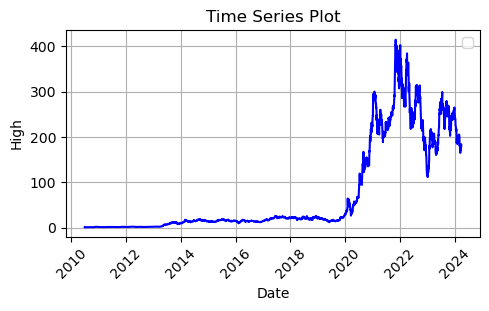

In [51]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(tesla_data['Date'], tesla_data['High'], color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Time Series Plot')
plt.legend()

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [52]:
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5564,2024-03-22 00:00:00-04:00,13.760000,13.950000,13.010000,13.100000,4400000,0.0,0.0
5565,2024-03-25 00:00:00-04:00,13.420000,15.150000,13.310000,15.120000,10416300,0.0,0.0
5566,2024-03-26 00:00:00-04:00,15.150000,15.630000,14.750000,15.500000,17245800,0.0,0.0
5567,2024-03-27 00:00:00-04:00,13.050000,13.720000,12.800000,13.170000,17820900,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


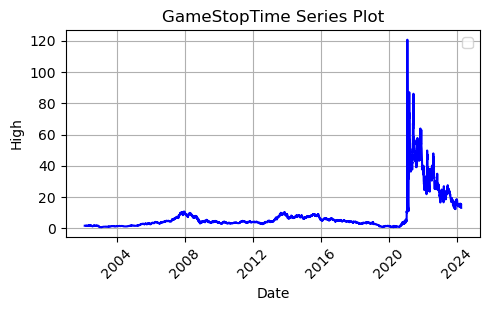

In [54]:
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(gme_data['Date'], gme_data['High'], color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('GameStopTime Series Plot')
plt.legend()

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()